# Шкарбаненко Михаил Б05-907

# Задача 1 (1.4)

Частота распределения слов в языке описывается [законом Ципфа](https://en.wikipedia.org/wiki/Zipf%27s_law).

Проверить, что он действительно описывает частоту слов (через формальный критерий) на основе анализа двух документов: [Анны Карениной](http://az.lib.ru/t/tolstoj_lew_nikolaewich/text_0080.shtml) и [новостного корпуса](https://object.pouta.csc.fi/OPUS-WMT-News/v2019/mono/ru.txt.gz). Можно ли утверждать, что параметры закона Ципфа для этих двух корпусов совпадают?

Пояснение по закону Ципфа: закон Ципфа утверждает, что в выборке из N элементов частота (вероятность) встретить элемент с рангом K равняется: const / K^a, где a --- параметр распределения. [Подробнее можно посмотреть здесь](https://artowen.su.domains/courses/306a/ZipfByHera.pdf).

## Решение

In [600]:
from string import ascii_letters
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

In [601]:
def rank_list(l):
    l.sort(reverse=True)
    res = []
    rank = 0
    for rank, x in enumerate(l, start=1):
        for i in range(x):
            res.append(rank)
    return res

In [602]:
allowed_characters = set('abcdefghijklmnopqrstuvwxyz' + 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя' + ' ')

## 1. Новостной корпус

In [603]:
nc_dict = {}

with open('news corpus.txt', 'r') as news_corpus:
    for sent in news_corpus:
        sent = sent.lower()
        new_sent = ''.join(c for c in sent if c in allowed_characters)
        for word in new_sent.split():
            if word not in nc_dict: 
                nc_dict[word] = 1
            else:
                nc_dict[word] += 1

nc_word_frequancies = list(nc_dict.values())
nc_data = np.array(rank_list(nc_word_frequancies))
data = nc_data[nc_data < 100]

### 1.1 Оценка параметра

Предположим, что частотные ранги слов распределены по закону Ципфа. В рамках этого предположения найдем наилучший с точки зрения оценки максимального правдоподобия параметр $a$ распредедния $const/K^a$.

  params: FitParams(a=1.35709070189885, loc=0.0)
 success: True
 message: 'Optimization terminated successfully.'


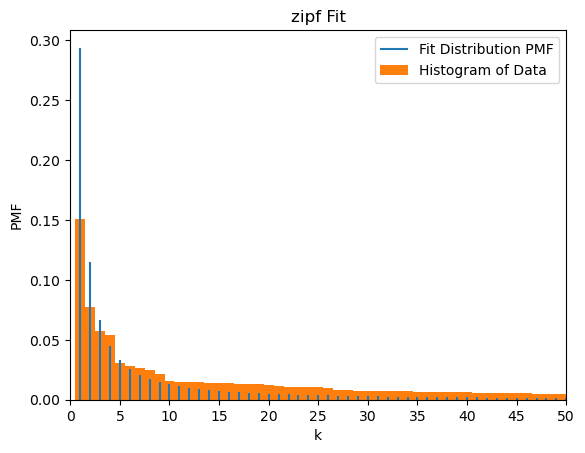

In [604]:
dist = stats.zipf
bounds = [(0, 5)]
res = stats.fit(dist, data, bounds)
print(res)
ax = res.plot()
ax.set_xlim([0, 50])
plt.show()

### 1.2 Проверка критерием

Зная оценку $a^*$ параметра распределния, можно проверить гипотезу о принадлежности имеющейся выборки к распредедния $const/K^{a^*}$ c помощью теста Колмогорова-Смирнова.

In [605]:
a = res.params.a
dist = stats.zipf(a=a, loc=0.0).cdf
stats.kstest(rvs=data, cdf=dist, method='exact')

KstestResult(statistic=0.2938588260909525, pvalue=0.0)

### 1.3 Вывод

Даже без учета длинного хвоста выборки согласно критерию Колмогорова-Смирнова нужно отклонить гипотезу о том, что ранги слов распределены по закону Ципфа. Но в действительности график говорит об обратном. Тест Колмогорова-Смирнова показывает отрицательный результат, так как форма имперического распределения несколько не соответствует форме распределния Ципфа - вероятности в хвосте затухают медленней, а значения в окрестности нуля наоборот недотягивают до ожидаемых теоретически. Я как исследователь не стал бы утверждать, что закон не работает. Можно говорить о не точном соответствии конкретному датасету.

## 2. Анна Каренина

Анна Каренина

Проведем аналогичную процедуру для второго текста.

In [606]:
ak_dict = {}

with open('anna karenina.txt', 'r') as anna_karenina:
    for sent in anna_karenina:
        sent = sent.lower()
        new_sent = ''.join(c for c in sent if c in allowed_characters)
        for word in new_sent.split():
            if word not in ak_dict: 
                ak_dict[word] = 1
            else:
                ak_dict[word] += 1

ak_word_frequancies = list(ak_dict.values())
ak_data = np.array(rank_list(ak_word_frequancies))
data = ak_data[ak_data < 100]

### 2.1 Оценка параметра

  params: FitParams(a=1.338688185587745, loc=0.0)
 success: True
 message: 'Optimization terminated successfully.'


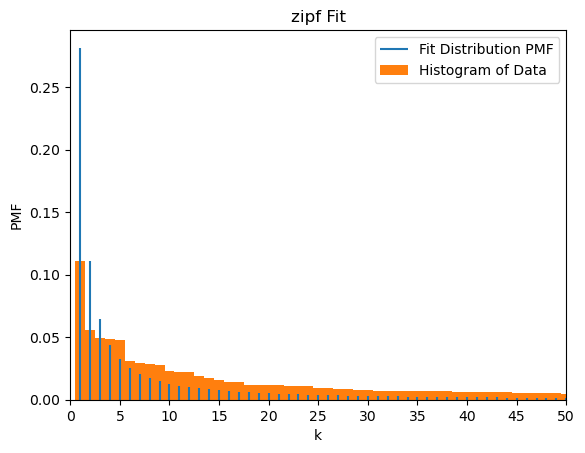

In [607]:
dist = stats.zipf
bounds = [(0, 5)]
res = stats.fit(dist, data, bounds)
print(res)
ax = res.plot()
ax.set_xlim([0, 50])
plt.show()

### 2.2 Проверка критерием

In [608]:
a = res.params.a
dist = stats.zipf(a=a, loc=0.0).cdf
stats.kstest(rvs=data, cdf=dist, method='exact')

KstestResult(statistic=0.29081516665098217, pvalue=0.0)

### 2.3 Вывод

Аналогичный пункту 1.3.

## 3. Сравнение распределний текстов

Здесь рассчитаны значения параметра распределения Ципфа для обоих текстов с использованием всей выборки - без отбрасывания хвостов.

In [628]:
from IPython.display import display, Math, Latex

In [636]:
dist = stats.zipf
bounds = [(0, 5)]
res = stats.fit(dist, nc_data, bounds)
print(r'Значение параметра "a" для новостного корпуса', res.params.a)
res = stats.fit(dist, ak_data, bounds)
print(r'Значение параметра "a" для для Анны Карениной ', res.params.a)

Значение параметра "a" для новостного корпуса 1.1594239544079126
Значение параметра "a" для для Анны Карениной  1.1728029955869772


### 3.1 Вывод 

Гипотеза о принадлежности распределений к закону Ципфа была отклонена для обоих текстов. Но в условиях ее истинности, с точки зрения оценки максимального правдоподобия, параметры распределний равны с точностью до сотых.